completed z-transformation.


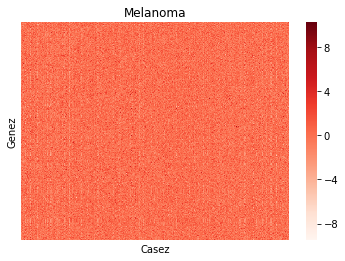

In [10]:
import miner2
import miner2.miner as miner
import miner2.preprocess
import os, sys, datetime
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt

rootDir = '/Users/user/melanoma_training/gdc_download'

sample_dfs = []

for dirName, subdirList, fileList in os.walk(rootDir):
    for fname in fileList:
        #print('\t%s' % fname)
        #extension = fname.split(".")[1]
        
        if ("FPKM" in fname) == True:
            #print fname
            path = os.path.join(rootDir,dirName,fname)
            df = pd.read_csv(path, index_col=0, header=None, sep='\t', quotechar='"')
            df.columns = [fname.split(".")[0]]
            sample_dfs.append(df)

expressionDataRaw = pd.concat(sample_dfs,axis=1)

expressionData = miner.transformFPKM(expressionDataRaw,fpkm_threshold=1,minFractionAboveThreshold=0.5,highlyExpressed=False)
#expressionData, conversionTable = miner2.miner.identifierConversion(expressionData)
    # error: IOError: [Errno 2] File ../data/identifier_mappings.txt does not exist: '../data/identifier_mappings.txt'
expressionData = miner2.preprocess.zscore(expressionData)

heat_map = sb.heatmap(expressionData, xticklabels=False, yticklabels=False, cmap="Reds")
plt.xlabel("Casez")
plt.ylabel("Genez")
plt.title("Melanoma")
plt.show()


#expressionData
